# Fits mit scipy
Eine gängige wissenschaftliche Praxis ist das Aufstellen einer Theorie und das anschließende Durchführen eines Experimentes zur Überprüfung. In der Auswertung der Experimente muss dann gezeigt werden, ob Theorie und Experiment vereinbar sind.

Im folgenden wird ein fiktiver Datensatz erzeugt und es wird ein linearer Zusammenhang vermutet.

[0.20236172 2.99821657]
[[ 6.38579770e-05 -3.19289886e-04]
 [-3.19289886e-04  2.18461500e-03]]


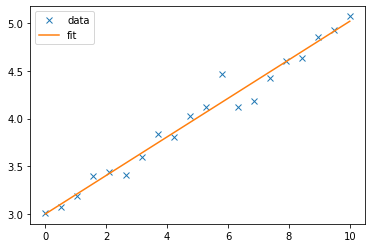

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def fit_func(x, m, b):
    return m*x + b

x_val = np.linspace(0,10, 20)
y_val = 0.2 * x_val + 3 + np.random.normal(0,0.1,20) # data with noise

para, pcov = curve_fit(fit_func, x_val, y_val)
print(para) # fit parameters
print(pcov) # covariance matrix


plt.plot(x_val, y_val, "x", label="data")
plt.plot(x_val, fit_func(x_val, para[0], para[1]), label="fit")
plt.legend()


Die Fitfunktion kann dabei beliebig viele Parameter nehmen und beliebig komplizierte Funktionen abbilden. Wichtig ist nur, dass die x-Werte als ersten Parameter übergeben werden.

# Errorplots
Wenn wir schon künstlich Messfehler erzeugen, können wir diese auch gleich darstellen. Dafür gibt es Errorplots.

<ErrorbarContainer object of 3 artists>

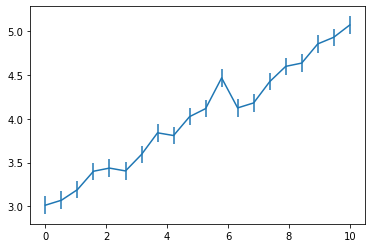

In [3]:
plt.errorbar(x=x_val, y=y_val, yerr=[0.1 for x in x_val]) 

Die Grundfunktionalität ist bereits zu sehen, aber hübsch ist der Plot bei weitem nicht. Im Folgenden werden ein paar kosmetische Optimierungen vorgenommen und zusätzlich der Fit geplottet.

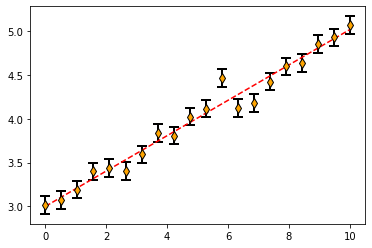

In [6]:
plot_defaults = {   "ls": '',         # linestyle            
                        "marker": 'd',     # marker shape             
                        "mfc": 'orange',   # markerfacecolor
                        "mec": 'k',        # marker edgecolor
                        "ms": 7,           # markersize
                        "ecolor": 'k',     # errorbar color
                        "elinewidth": 2,   # errorbar linewidth
                        "capsize": 5,      
                        "capthick": 2    }

plt.errorbar(x=x_val, y=y_val, yerr=[0.1 for x in x_val], **plot_defaults) 
plt.plot(x_val, fit_func(x_val, para[0], para[1]), label="fit", color="red", ls="dashed")